I will be exploring the data for premier league for last 10 years and specifically look at Liverpool's journey toward winning their first premier league in 30 years (only been delayed because of Covid-19).

1. How they performed in the 10 seasons?

2. Which Manager had the most impact on the performances?

3. Can be see any evidence of success with spending more money on transfers (players) ?

In [54]:
#loading the libraries
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings


I was able to find all the relevant data for premier league matches from this website:
https://www.football-data.co.uk/englandm.php

In [55]:
path = r"C:\Users\Owner\OneDrive\Data Camp\Premier League\premier_league_data" # use your path
all_files = glob.glob(path + "/*.csv")

In [56]:
all_files

['C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2009-10.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2010-11.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2011-12.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2012-13.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2013-14.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2014-15.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2015-16.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2016-17.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2017-18.csv',
 'C:\\Users\\Owner\\OneDrive\\Data Camp\\Premier League\\premier_league_data\\PL 2018-19.csv']

In [57]:
#using for loop to upload and append the data

In [58]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [59]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAvAHH,BbMxAHA,BbAvAHA,FY,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,15/08/2009,Aston Villa,Wigan,0,2,A,0,1,A,...,1.22,4.40,3.99,FY0910,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,15/08/2009,Blackburn,Man City,0,2,A,0,1,A,...,2.38,1.60,1.54,FY0910,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,15/08/2009,Bolton,Sunderland,0,1,A,0,1,A,...,1.61,2.33,2.23,FY0910,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,15/08/2009,Chelsea,Hull,2,1,H,1,1,D,...,1.02,17.05,12.96,FY0910,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,15/08/2009,Everton,Arsenal,1,6,A,0,3,A,...,2.20,1.73,1.63,FY0910,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#data = data.dropna()

In [61]:
# choosing columns that gives more information about their success.  
data=data[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR','FY']]

In [62]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FY
0,15/08/2009,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,7,15,14,4,6,2,2,0,0,FY0910
1,15/08/2009,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,5,12,9,5,4,2,1,0,0,FY0910
2,15/08/2009,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,13,16,10,4,7,2,1,0,0,FY0910
3,15/08/2009,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,3,13,15,12,4,1,2,0,0,FY0910
4,15/08/2009,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,9,11,13,4,9,0,0,0,0,FY0910


In [63]:
data = data.drop_duplicates()

adding new columns 

- MatchWinner: Who won the match?

- HalftimeWinner: Who was winning the match at half time?


In [64]:
data['MatchWinner'] = np.where(data['FTR'] == 'A',data['AwayTeam'],(np.where(data['FTR'] == 'H',data['HomeTeam'],'draw')))

In [65]:
data['halftimeWinner'] = np.where(data['HTR'] == 'A',data['AwayTeam'],(np.where(data['HTR'] == 'H',data['HomeTeam'],'draw')))

In [66]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FY,MatchWinner,halftimeWinner
0,15/08/2009,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,14,4,6,2,2,0,0,FY0910,Wigan,Wigan
1,15/08/2009,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,4,2,1,0,0,FY0910,Man City,Man City
2,15/08/2009,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,10,4,7,2,1,0,0,FY0910,Sunderland,Sunderland
3,15/08/2009,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,15,12,4,1,2,0,0,FY0910,Chelsea,draw
4,15/08/2009,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,13,4,9,0,0,0,0,FY0910,Arsenal,Arsenal


# Convert Dtypes - Dates

In [67]:
data['Date'] = pd.to_datetime(data['Date'])

In [68]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FY,MatchWinner,halftimeWinner
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,14,4,6,2,2,0,0,FY0910,Wigan,Wigan
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,4,2,1,0,0,FY0910,Man City,Man City
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,10,4,7,2,1,0,0,FY0910,Sunderland,Sunderland
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,15,12,4,1,2,0,0,FY0910,Chelsea,draw
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,13,4,9,0,0,0,0,FY0910,Arsenal,Arsenal


In [69]:
data.shape

(3800, 25)

In [70]:
print('No of missing values :',data.isnull().sum().sum())

No of missing values : 0


# Last Decade - Premier League 

In [71]:
TenYear = pd.pivot_table(data,index='FY',columns='MatchWinner',values='FTR',aggfunc='count')

Text(0.5, 1.0, 'Team by Winning Matches - Last Decade')

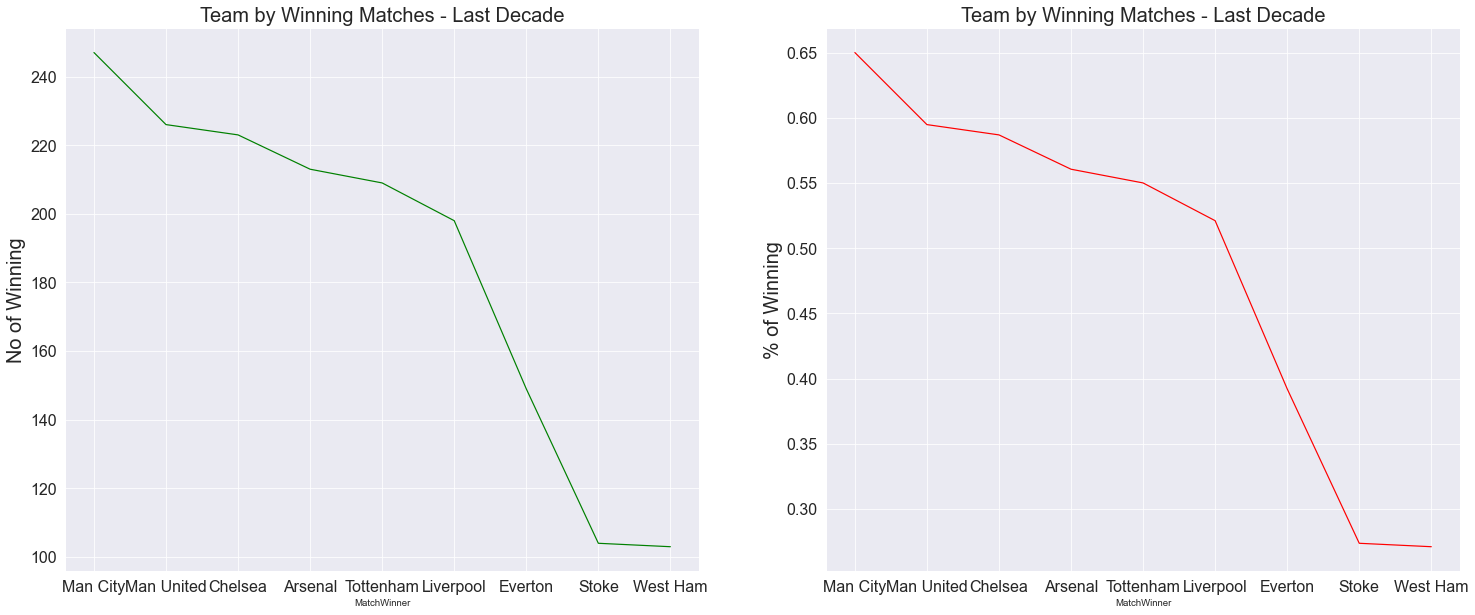

In [89]:
sns.set_style('darkgrid')
sns.set_context("paper")
plt.subplot(121)
TenYear.sum().nlargest(11)[1:10].plot(figsize=(25,10),color='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('No of Winning',fontsize=20)
plt.title('Team by Winning Matches - Last Decade',fontsize=20)
plt.subplot(122)
(TenYear.sum().nlargest(11)[1:10]/380).plot(figsize=(25,10),color='r') #38 matches per season over 10 years
plt.ylabel('% of Winning',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Team by Winning Matches - Last Decade',fontsize=20)

Man City has been the most successful team in the last decade winning close to 65% of the matches. 

In [23]:
plt.figure(figsize=(15,10))
Top5 = TenYear[['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Man United']]/38

<Figure size 1080x720 with 0 Axes>

Text(0, 0.5, '% of Winning')

<Figure size 1080x720 with 0 Axes>

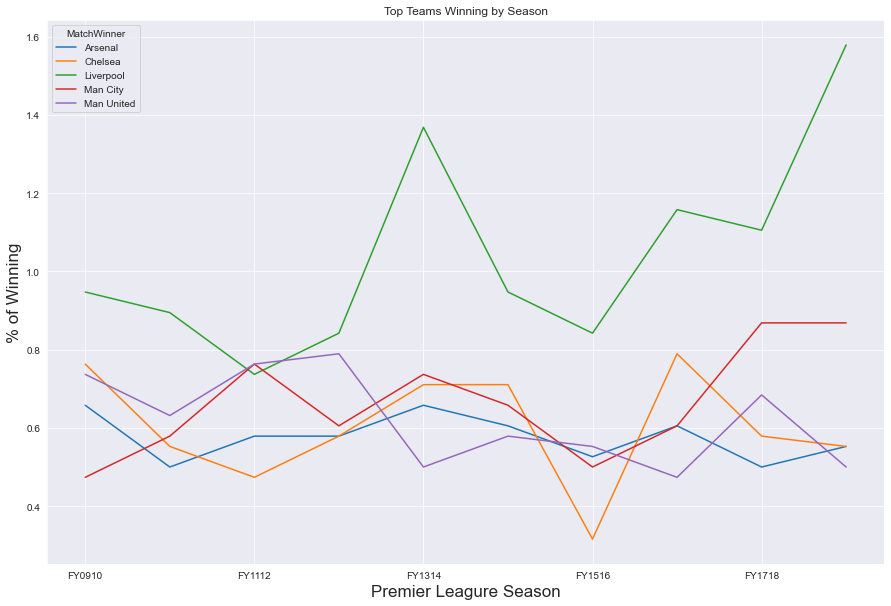

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
Top5.plot(kind='line',figsize=(15,10))
plt.title('Top Teams Winning by Season')
plt.xlabel('Premier Leagure Season',fontsize=17)
plt.ylabel('% of Winning',fontsize=17)

From the graph, we can see both Man city and Liverpool started the decade on Low winning percentage however by the end of the decade they almost double their winning percentage.

In [25]:
Top5.describe()

MatchWinner,Arsenal,Chelsea,Liverpool,Man City,Man United
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.576316,0.602632,1.042105,0.665789,0.621053
std,0.057454,0.144910,0.263509,0.139829,0.117164
min,0.500000,0.315789,0.736842,0.473684,0.473684
25%,0.532895,0.552632,0.855263,0.585526,0.513158
50%,0.578947,0.578947,0.947368,0.631579,0.605263
75%,0.605263,0.710526,1.144737,0.756579,0.723684
max,0.657895,0.789474,1.578947,0.868421,0.789474


On Average Liverpool has the worst winning percentage.

# Liverpool

In [90]:
Liverpool = data[(data['HomeTeam']==('Liverpool')) | (data['AwayTeam']==('Liverpool'))]

In [91]:
Liverpool.FY.value_counts()

FY1819    38
FY1415    38
FY0910    38
FY1112    38
FY1213    38
FY1011    38
FY1718    38
FY1314    38
FY1516    38
FY1617    38
Name: FY, dtype: int64

There are 38 Matches each season.so total of 380 Matches across 10 Season. 

In [28]:
Liverpool.groupby('FY').sum()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FY,,,,,,,,,,,,,,,,
FY0910,126,66,58,26,998,696,550,386,914,948,480,340,108,154,6,12
FY1011,134,72,56,26,974,794,550,404,864,866,414,348,108,136,4,6
FY1112,96,78,40,34,1126,850,578,480,776,724,524,382,104,142,6,12
FY1213,120,108,58,48,1232,872,700,504,750,704,518,380,98,140,4,4
FY1314,170,132,98,62,1256,994,456,362,828,856,432,396,126,154,8,6
FY1415,116,84,60,30,1112,898,372,302,846,900,436,358,132,160,8,6
FY1516,122,104,52,42,1184,868,370,302,694,938,460,420,96,120,2,10
FY1617,138,102,70,48,994,896,392,308,802,794,376,388,110,140,0,2
FY1718,146,98,60,44,1046,798,402,270,658,678,396,316,78,108,0,2


In [34]:
Liverpool['FT_Point'] = np.where(Liverpool['MatchWinner']=='Liverpool',3,(np.where(Liverpool['MatchWinner']=='draw',1,0)))
Liverpool['FT_Winner'] = np.where(Liverpool['MatchWinner']=='Liverpool',1,0)
Liverpool['FT_Draw'] = np.where(Liverpool['MatchWinner']=='draw',1,0)
Liverpool['FT_Loss'] = np.where(((Liverpool['MatchWinner']!='Liverpool') & (Liverpool['MatchWinner']!='draw')),1,0)
Liverpool['HT_Winner'] = np.where(Liverpool['halftimeWinner']=='Liverpool',1,0)
Liverpool['HT_Draw'] = np.where(Liverpool['halftimeWinner']=='draw',1,0)
Liverpool['HT_Loss'] = np.where(Liverpool['halftimeWinner']!='Liverpool',1,0)
Liverpool['Target_Home%'] = round((Liverpool['HST']/Liverpool['HS']).mul(100),2)
Liverpool['Target_Away%'] = round((Liverpool['AST']/Liverpool['AS']).mul(100),2)
warnings.filterwarnings('ignore')
warnings.filterwarnings('once')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
Liverpool['Manager'] = np.where(Liverpool['Date']<='2010-06-03','Rafael Benítez',(
    np.where(Liverpool['Date'].between('2010-06-03','2011-01-08'),'Roy Hodgson',(
    np.where(Liverpool['Date'].between('2011-01-08','2012-05-16'),'Kenny Dalglish',(
    np.where(Liverpool['Date'].between('2012-06-01','2015-10-07'),'Brendan Rodgers','Jürgen Klopp')))))))
warnings.filterwarnings('ignore')
warnings.filterwarnings('once')


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
Liverpool.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HT_Loss,Target_Home%,Target_Away%,Manager,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw
0,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,...,1,64.71,50.00,Rafael Benítez,0,0,0,1,0,0
1,2009-08-19,Liverpool,Stoke,4,0,H,2,0,H,P Walton,...,0,72.22,50.00,Rafael Benítez,1,0,0,0,0,0
2,2009-08-24,Liverpool,Aston Villa,1,3,A,0,2,A,M Atkinson,...,1,57.14,57.14,Rafael Benítez,0,0,1,0,0,0
3,2009-08-29,Bolton,Liverpool,2,3,A,1,1,D,A Wiley,...,1,62.50,53.85,Rafael Benítez,0,1,0,0,0,0
4,2009-12-09,Liverpool,Burnley,4,0,H,2,0,H,L Mason,...,0,59.26,50.00,Rafael Benítez,1,0,0,0,0,0


In [37]:
Liverpool['Home_Win'] = np.where(((Liverpool['HomeTeam']=='Liverpool') & (Liverpool['MatchWinner']=='Liverpool')),1,0)
Liverpool['Away_Win'] = np.where(((Liverpool['AwayTeam']=='Liverpool') & (Liverpool['MatchWinner']=='Liverpool')),1,0)
Liverpool['Home_Loss'] = np.where(((Liverpool['HomeTeam']=='Liverpool') & (Liverpool['MatchWinner']!='Liverpool') & (Liverpool['MatchWinner']!='draw')),1,0)
Liverpool['Away_Loss'] = np.where(((Liverpool['AwayTeam']=='Liverpool') & (Liverpool['MatchWinner']!='Liverpool') & (Liverpool['MatchWinner']!='draw') ),1,0)
Liverpool['Home_Draw'] = np.where(((Liverpool['HomeTeam']=='Liverpool') & (Liverpool['MatchWinner']=='draw')),1,0)
Liverpool['Away_Draw'] = np.where(((Liverpool['AwayTeam']=='Liverpool') & (Liverpool['MatchWinner']=='draw')),1,0)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Last 10 Years

Text(0.5, 0, '')

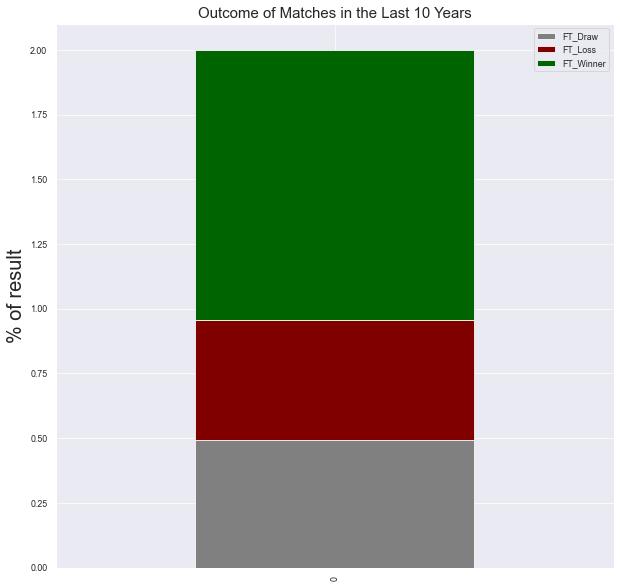

In [38]:
TenY = Liverpool[['FT_Winner','FT_Draw','FT_Loss']].sum().div(380) # getting win,draw and losses as percentage 
TenY.columns = TenY.index
TenY = TenY.reset_index()
stack = pd.pivot_table(TenY,columns='index',values=0)
stack.columns.name = None
sns.set_context("paper")
col = ['grey','maroon','darkgreen']
stack.plot(kind='bar',stacked=True,color=col,figsize=(10,10))
plt.title('Outcome of Matches in the Last 10 Years',fontsize=15)
plt.ylabel('% of result',fontsize=20)
plt.xlabel('')

In the Last 10 Year, Liverpool have won over 50% of their games however the ratio of Draw and losses are pretty similar. 

Let's look at how they performed each season.

Text(0, 0.5, 'Matches')

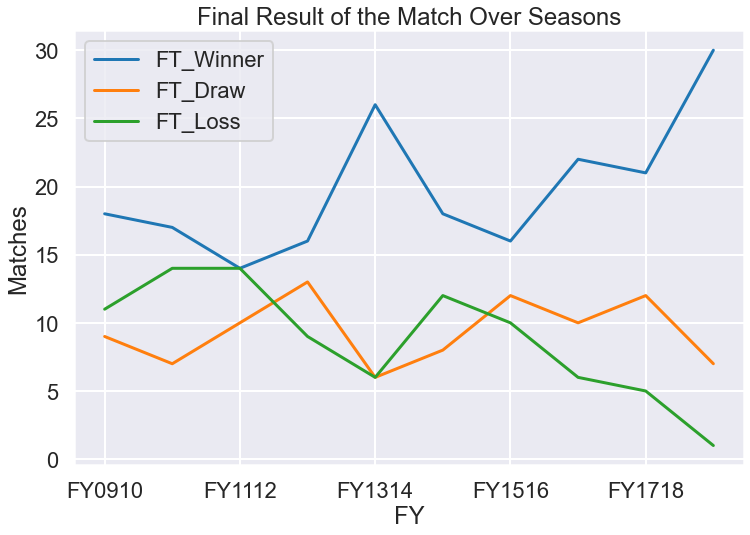

In [163]:
YY = Liverpool[['FY','FT_Winner','FT_Draw','FT_Loss']]
YY.groupby('FY').sum().plot(figsize=(12,8),title='Final Result of the Match Over Seasons')
plt.ylabel('Matches')

In [164]:
#result by percentage 

Text(0, 0.5, 'Outcome %')

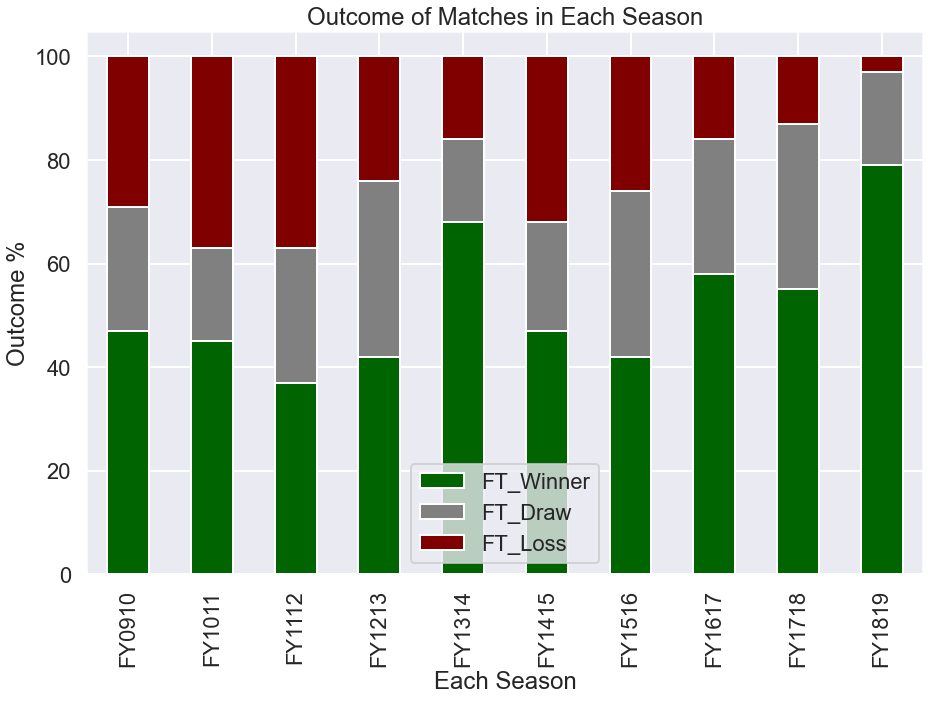

In [165]:
col = ['darkgreen','grey','maroon']
#p = ['upper right']
sns.set_context("poster")
round((YY.groupby('FY').sum()/38).mul(100),0).plot(kind='bar',stacked=True,color=col,figsize=(15,10))
plt.title('Outcome of Matches in Each Season')
plt.xlabel('Each Season')
plt.ylabel('Outcome %')

The first half of the decade Liverpool had more loss compared to draw and second half of the decade it converted loss into draws, which resulted in more winners last season.

# Manager

In [166]:
Manager = Liverpool[['FY','Manager','FT_Winner','FT_Draw','FT_Loss']]

In [167]:
total = Manager.groupby('Manager').sum()

In [168]:
Mang = round((total.div(total.sum(axis=1), axis=0)).mul(100),1)

Text(0.5, 0, 'Outcome %')

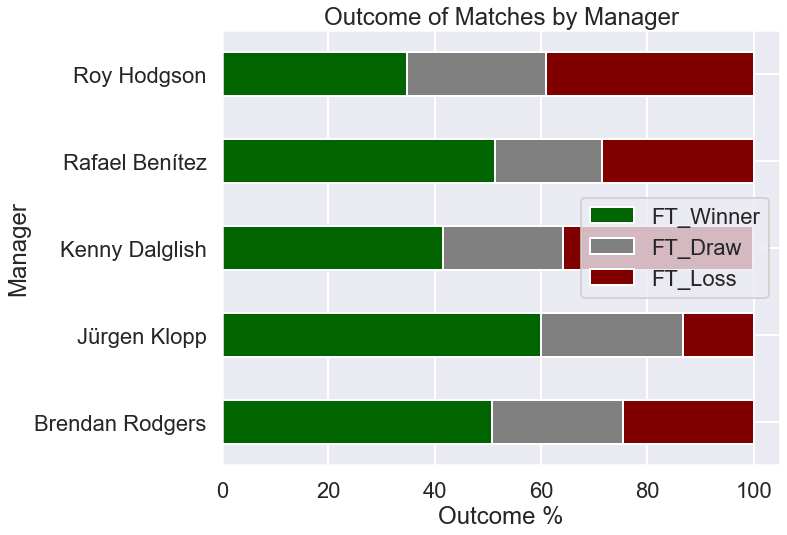

In [170]:
col = ['darkgreen','grey','maroon']
Mang.plot(kind='barh',stacked=True,figsize=(10,8),color=col)
plt.title('Outcome of Matches by Manager')
plt.xlabel('Outcome %')

In [171]:
Mang['Total_Matches'] = total.sum(axis=1)

In [172]:
Mang.sort_values('Total_Matches',ascending=False)

,FT_Winner,FT_Draw,FT_Loss,Total_Matches
Manager,,,,
Jürgen Klopp,60.1,26.6,13.3,143
Brendan Rodgers,50.8,24.6,24.6,126
Kenny Dalglish,41.5,22.6,35.8,53
Rafael Benítez,51.4,20.0,28.6,35
Roy Hodgson,34.8,26.1,39.1,23


Klopp has the best record in terms of wins and fewer losses, which had greatly contribute to Liverpool's success recently. Roy Hodgson has the worst record which shows why he was fired under one year.

# Who won more matches Home vs Away ?

In [173]:
More = Liverpool[['FY','Manager','FT_Winner','FT_Draw','FT_Loss','Home_Win','Away_Win','Home_Draw','Away_Draw','Home_Loss','Away_Loss']]
HA = More.groupby('Manager').sum()
#HA['Total_Matches'] = HA['FT_Winner']+ HA['FT_Draw']+ HA['FT_Loss']
HH = HA[['Home_Win', 'Away_Win', 'Home_Draw',
       'Away_Draw', 'Home_Loss', 'Away_Loss']]
HH['Total_Matches'] = HH.sum(axis=1)
HH

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Home_Win,Away_Win,Home_Draw,Away_Draw,Home_Loss,Away_Loss,Total_Matches
Manager,,,,,,,
Brendan Rodgers,37,27,14,17,11,20,126
Jürgen Klopp,47,39,21,17,3,16,143
Kenny Dalglish,11,11,10,2,6,13,53
Rafael Benítez,13,5,2,5,4,6,35
Roy Hodgson,7,1,3,3,1,8,23


- All the Managers had more losses on away matches which makes sense.

- Similar trend is shown in winning more at Home Vs Away.

- Kenny Dalglish is the only manager to lose more matches at Home compare to Away.

In [174]:
MM = round((HH.div(HH.sum(axis=1), axis=0)).mul(100),1)
MM['Total_Matches'] = HH['Total_Matches']
MM.sort_values('Total_Matches',ascending=False)

,Home_Win,Away_Win,Home_Draw,Away_Draw,Home_Loss,Away_Loss,Total_Matches
Manager,,,,,,,
Jürgen Klopp,16.4,13.6,7.3,5.9,1.0,5.6,143
Brendan Rodgers,14.7,10.7,5.6,6.7,4.4,7.9,126
Kenny Dalglish,10.4,10.4,9.4,1.9,5.7,12.3,53
Rafael Benítez,18.6,7.1,2.9,7.1,5.7,8.6,35
Roy Hodgson,15.2,2.2,6.5,6.5,2.2,17.4,23


# Shots

In [175]:
Shot =Liverpool[['FY','Manager','FT_Winner','FT_Draw','FT_Loss','HS', 'AS', 'HST', 'AST']]

In [176]:
shot = Shot.groupby('Manager').sum()

In [177]:
shot['Target_Home%'] = round((shot['HST']/shot['HS']).mul(100),2)
shot['Target_Away%'] = round((shot['AST']/shot['AS']).mul(100),2)


In [178]:
new_shot = shot[['HS', 'AS','HST','AST','Target_Home%', 'Target_Away%','FT_Winner','FT_Draw','FT_Loss']]
new_shot['Total_Matches'] = shot[['FT_Winner','FT_Draw','FT_Loss']].sum(axis=1)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
new_shot['Avg_Tg_Home'] = round((new_shot['HS']/new_shot['Total_Matches']),2)
new_shot['Avg_Tg_Away'] = round((new_shot['AS']/new_shot['Total_Matches']),2)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
new_shot

,HS,AS,HST,AST,Target_Home%,Target_Away%,FT_Winner,FT_Draw,FT_Loss,Total_Matches,Avg_Tg_Home,Avg_Tg_Away
Manager,,,,,,,,,,,,
Brendan Rodgers,1968,1507,809,640,41.11,42.47,64,31,31,126,15.62,11.96
Jürgen Klopp,1985,1549,728,547,36.68,35.31,86,38,19,143,13.88,10.83
Kenny Dalglish,770,590,416,324,54.03,54.92,22,12,19,53,14.53,11.13
Rafael Benítez,466,318,260,181,55.79,56.92,18,7,10,35,13.31,9.09
Roy Hodgson,288,234,155,107,53.82,45.73,8,6,9,23,12.52,10.17


Under Kloop the average target shot for both Home and away matches are lowest among his peers however he still has more wins compare to other managers. This is interesting, it would be good to look into the margin of victories?

# Margin of Winning

In [181]:
Liverpool.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Target_Home%,Target_Away%,Manager,Home_Win,Away_Win,Home_Loss,Away_Loss,Home_Draw,Away_Draw,Diff_Score
0,9,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,...,64.71,50.00,Rafael Benítez,0,0,0,1,0,0,-1
1,15,2009-08-19,Liverpool,Stoke,4,0,H,2,0,H,...,72.22,50.00,Rafael Benítez,1,0,0,0,0,0,4
2,25,2009-08-24,Liverpool,Aston Villa,1,3,A,0,2,A,...,57.14,57.14,Rafael Benítez,0,0,1,0,0,0,-2
3,27,2009-08-29,Bolton,Liverpool,2,3,A,1,1,D,...,62.50,53.85,Rafael Benítez,0,1,0,0,0,0,1
4,37,2009-12-09,Liverpool,Burnley,4,0,H,2,0,H,...,59.26,50.00,Rafael Benítez,1,0,0,0,0,0,4


In [182]:
Liverpool['Diff_Score']= np.where(Liverpool['HomeTeam']=='Liverpool',Liverpool['FTHG']-Liverpool['FTAG'],Liverpool['FTAG']-Liverpool['FTHG'])

In [183]:
score = pd.pivot_table(Liverpool,index='Diff_Score',columns='Manager',values='Date',aggfunc='count')

Text(0.5, 0, 'Difference in goals')

<Figure size 1080x864 with 0 Axes>

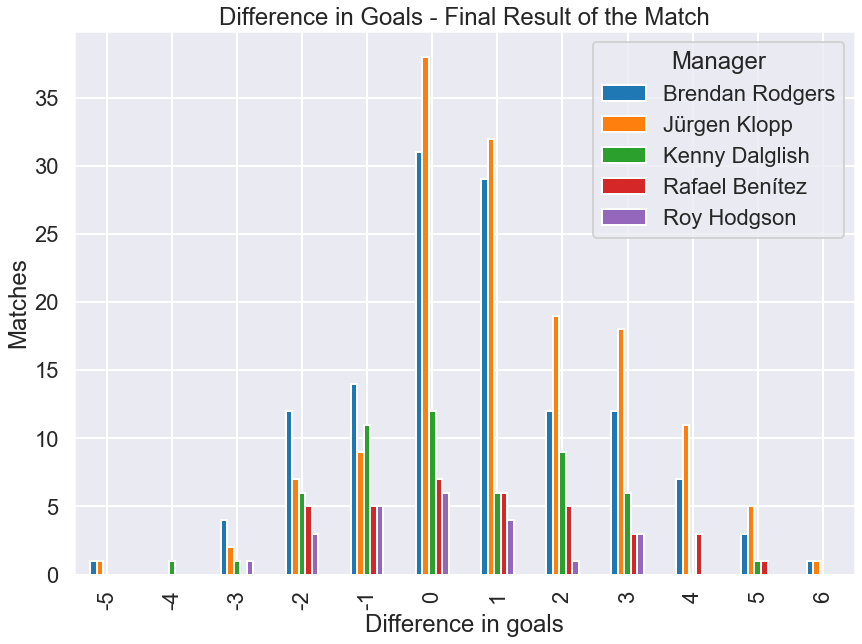

In [192]:
sns.set_context('poster') 
ax =plt.figure(figsize=(15,12))
ax = score.plot(kind='bar',figsize=(14,10))
ax = plt.title('Difference in Goals - Final Result of the Match')
plt.ylabel('Matches')
plt.xlabel('Difference in goals')

<Figure size 1080x720 with 0 Axes>

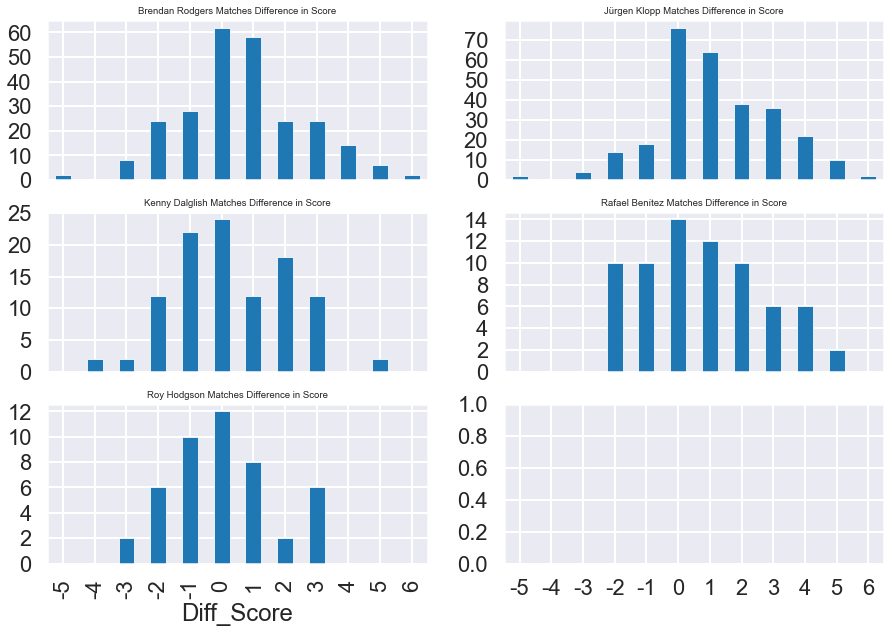

In [60]:
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(3,2,sharex='col')
sns.set_context('paper')
score['Brendan Rodgers'].plot(kind='bar',ax=ax[0][0],figsize=(15,15),title='Brendan Rodgers Matches Difference in Score')
plt.xlabel='Differnce in Score'
score['Jürgen Klopp'].plot(kind='bar',ax=ax[0][1],figsize=(12,10),title='Jürgen Klopp Matches Difference in Score')
score['Kenny Dalglish'].plot(kind='bar',ax=ax[1][0],figsize=(15,10),title='Kenny Dalglish Matches Difference in Score')
score['Rafael Benítez'].plot(kind='bar',ax=ax[1][1],figsize=(15,10),title='Rafael Benítez Matches Difference in Score')
score['Roy Hodgson'].plot(kind='bar',ax=ax[2][0],figsize=(15,10),title='Roy Hodgson Matches Difference in Score')


Jürgen Klopp has a distribution toward right hand side, he has the most draws and majority of this winners are difference of 1 or 2 goals.

-37% of wins came with difference of one goal and 59% of wins came with combine difference of one and two goals.

In [92]:
#Liverpool.to_csv('liverpool.csv')

# Finance 

In [121]:
transfer = pd.read_csv('./other_files/transfer.csv')
Liverpool = pd.read_csv('./other_files/liverpool.csv')

In [122]:
new_data = transfer.merge(Liverpool,left_on='Year',right_on='FY')

In [123]:
spend = new_data[['Year', 'Spending', 'FT_Draw', 'FT_Loss', 'FT_Winner']]

In [125]:
tra =spend.groupby('Spending').sum().reset_index()

Text(0.5, 0, 'Season')

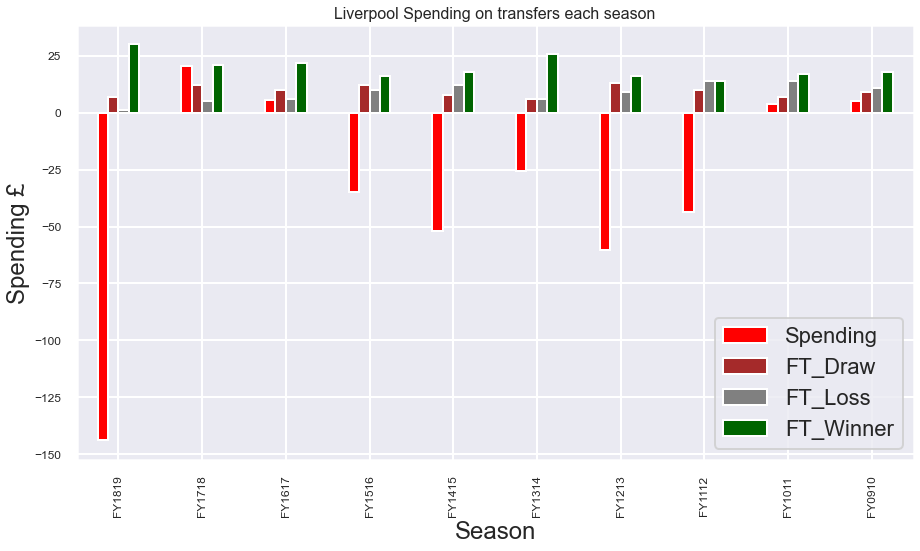

In [195]:
fin = transfer.merge(tra,left_on='Spending',right_on='Spending')
fin = fin.set_index('Year')
col = ['red','brown','grey','darkgreen']
sns.set_style('darkgrid')
sns.set_context('poster')
fin.plot(kind='bar',fontsize=12,figsize=(15,8),color=col)
plt.title('Liverpool Spending on transfers each season',fontsize=16)
plt.ylabel('Spending £')
plt.xlabel('Season')

In [197]:
fin['Spending'] = - fin['Spending']

Text(0.5, 1.0, 'Correlation between spending and the outcome of the match')

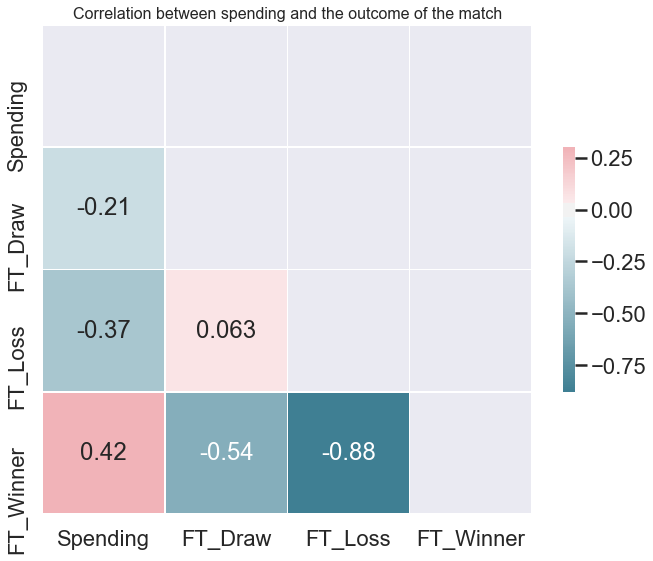

In [198]:
corr = fin.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between spending and the outcome of the match',fontsize=16)

# Export to csv

In [156]:
#new_data.to_csv('Premier_League.csv')